# Hasztagiem na początku kodu jest opisane który numer kolumny zmieniam żeby jakoś to ten

In [137]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from datetime import datetime
from pandas.api.types import is_numeric_dtype
import numpy as np

In [138]:
df = pd.read_csv('train.csv', low_memory=False)

In [139]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [140]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [142]:
df['ID'].drop_duplicates().shape[0]
# każdy wiersz ma swoje id więc wszystkie wpisy w tabeli są unikalne
# df = df.drop(columns = ['ID', 'Name', 'SSN'])

100000

### Tutaj sobie zdefiniowałem taką funkcję żeby kilka razy tego nie pisać, to usuwa po prostu "_"

In [143]:
def Object_to_Numeric(df, s):
    return pd.to_numeric(df[s].str.replace('_', ''))

### Tutaj kilka łatwych zamian

In [144]:
#19, 24, 16, 26
df['Outstanding_Debt'] = Object_to_Numeric(df, 'Outstanding_Debt')
df['Amount_invested_monthly'] = Object_to_Numeric(df, 'Amount_invested_monthly')
df['Changed_Credit_Limit'] = Object_to_Numeric(df, 'Changed_Credit_Limit')
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace('_', '')
df = df.astype({'Monthly_Balance': 'float'}) # Monthly_Balance jakoś nie chciał współpracować,
                                                 # ale jest git

In [145]:
#2 Month na numeric
df['Month'] = df['Month'].apply(lambda mname: datetime.strptime(mname, '%B').month)

In [146]:
is_numeric_dtype(df['Month'])

True

In [147]:
#4 Age na numeric
df['Age'] = df['Age'].convert_dtypes().apply(lambda x: x.replace("_", "")).astype(int)

In [148]:
is_numeric_dtype(df['Age'])

True

In [149]:
#7 Annual_Income na numeric
df['Annual_Income'] = df['Annual_Income'].convert_dtypes().apply(lambda x: x.replace("_", "")).astype(float)

In [150]:
is_numeric_dtype(df['Annual_Income'])

True

In [151]:
#12 Num_of_Loan na numeric
df['Num_of_Loan'] = df['Num_of_Loan'].convert_dtypes().apply(lambda x: x.replace("_", "")).astype(int)

In [152]:
is_numeric_dtype(df['Num_of_Loan'])

True

In [153]:
#15 Num_of_Delayed_Payment na numeric
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].convert_dtypes()
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_', '')
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'])

In [154]:
is_numeric_dtype(df['Num_of_Delayed_Payment'])

True

### Tu jakieś szalone rzeczy, ale tylko dla kolumny 'Credit_History_Age'

In [155]:
#21
def History_Age_2_months(df):
    df['Credit_History_Age'] = df['Credit_History_Age'].str.replace(' Months', '')
    return df['Credit_History_Age'].str.replace('\D+', '* 12 +')
df['Credit_History_Age'] = History_Age_2_months(df)
df['Credit_History_Age'].loc[df.Credit_History_Age.isnull()] = df['Credit_History_Age'].loc[df.Credit_History_Age.isnull()].apply(
        lambda x: '-1') #Brak danych jest teraz -1
df['Credit_History_Age'] = df['Credit_History_Age'].apply(eval)

C:\Users\wwier\AppData\Local\Temp\ipykernel_8928\3879719832.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  return df['Credit_History_Age'].str.replace('\D+', '* 12 +')
C:\Users\wwier\AppData\Local\Temp\ipykernel_8928\3879719832.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Credit_History_Age'].loc[df.Credit_History_Age.isnull()] = df['Credit_History_Age'].loc[df.Credit_History_Age.isnull()].apply(


## One-Hot dla Paymentów

In [156]:
#22, 25
one_hot = pd.get_dummies(df['Payment_of_Min_Amount'])
df = df.drop('Payment_of_Min_Amount', axis=1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['Payment_Behaviour'])
df = df.drop('Payment_Behaviour', axis=1)
df = df.join(one_hot)

#### Ostre dymy z typami kredytów

In [157]:
#13
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace('and ', '')
df.Type_of_Loan = df.Type_of_Loan.str.split(', ')
df['Type_of_Loan'].loc[df.Type_of_Loan.isnull()] = df['Type_of_Loan'].loc[df.Type_of_Loan.isnull()].apply(lambda x: [])
mlb = MultiLabelBinarizer(sparse_output=True)
df = df.join(
    pd.DataFrame.sparse.from_spmatrix(
        mlb.fit_transform(df.pop('Type_of_Loan')),
        index=df.index,
        columns=mlb.classes_))
df.rename(columns={'!@9#%8': 'No_Payment_Data',
                    'No': 'Min_Amount_Not_Paid',
                    'Yes': 'Min_Amount_Paid',
                    }, inplace=True)

C:\Users\wwier\AppData\Local\Temp\ipykernel_8928\810628542.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type_of_Loan'].loc[df.Type_of_Loan.isnull()] = df['Type_of_Loan'].loc[df.Type_of_Loan.isnull()].apply(lambda x: [])


In [158]:
df['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [159]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)
df['Credit_Mix'] = df['Credit_Mix'].replace('Good', 2)
df['Credit_Mix'] = df['Credit_Mix'].replace('Standard', 1)
df['Credit_Mix'] = df['Credit_Mix'].replace('Bad', 0)

In [160]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [161]:
df['Credit_Score'] = df['Credit_Score'].replace('Good', 2)
df['Credit_Score'] = df['Credit_Score'].replace('Standard', 1)
df['Credit_Score'] = df['Credit_Score'].replace('Poor', 0)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 44 columns):
 #   Column                            Non-Null Count   Dtype           
---  ------                            --------------   -----           
 0   ID                                100000 non-null  object          
 1   Customer_ID                       100000 non-null  object          
 2   Month                             100000 non-null  int64           
 3   Name                              90015 non-null   object          
 4   Age                               100000 non-null  int32           
 5   SSN                               100000 non-null  object          
 6   Occupation                        100000 non-null  object          
 7   Annual_Income                     100000 non-null  float64         
 8   Monthly_Inhand_Salary             84998 non-null   float64         
 9   Num_Bank_Accounts                 100000 non-null  int64           
 10  Num_Credi

In [163]:
import seaborn as sns

<AxesSubplot:>

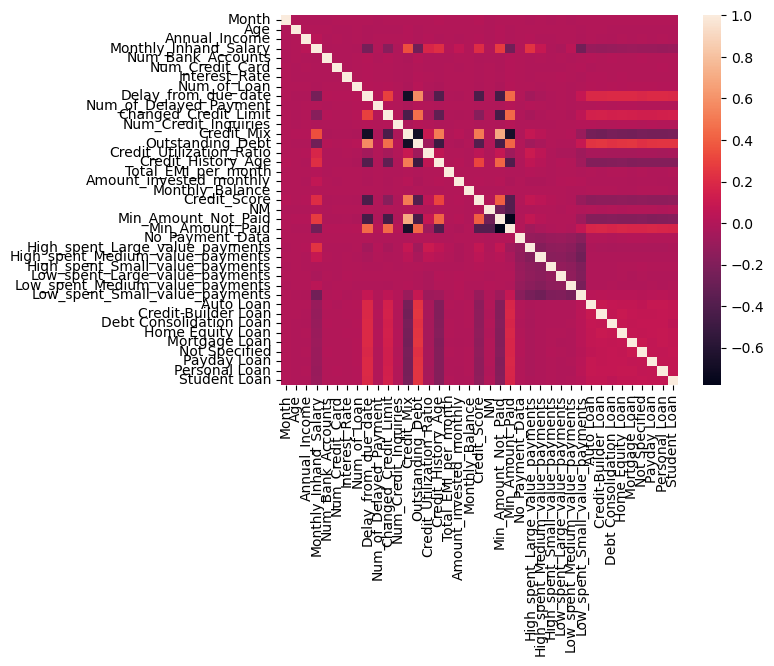

In [164]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)